In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('dataset.csv')
df.columns = [i for i in range(df.shape[1])]
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,a
1,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,a
2,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,a
3,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,a
4,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1809,0.470511,0.780105,-5.755709e-07,0.350840,0.686826,-0.048804,0.312760,0.486502,-0.062942,0.429956,...,0.693906,0.423898,-0.125282,0.635736,0.514567,-0.090412,0.627056,0.560267,-0.049825,z
1810,0.480139,0.802661,-5.649540e-07,0.364645,0.692505,-0.061196,0.344611,0.509185,-0.075893,0.458813,...,0.701844,0.445910,-0.122325,0.645537,0.533402,-0.095136,0.625395,0.571274,-0.058825,z
1811,0.442224,0.788687,-5.727842e-07,0.342907,0.664143,-0.014082,0.311246,0.469312,-0.023869,0.397701,...,0.634490,0.436950,-0.143006,0.568386,0.520747,-0.101792,0.584898,0.564683,-0.056343,z
1812,0.497017,0.796805,-6.652022e-07,0.375755,0.699207,-0.016435,0.298315,0.517770,-0.031210,0.345991,...,0.600744,0.412018,-0.143159,0.552847,0.505526,-0.106491,0.578944,0.551039,-0.065046,z


In [3]:
df = df.rename(columns={63: 'Output'})
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,Output
0,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,a
1,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,a
2,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,a
3,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,a
4,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1809,0.470511,0.780105,-5.755709e-07,0.350840,0.686826,-0.048804,0.312760,0.486502,-0.062942,0.429956,...,0.693906,0.423898,-0.125282,0.635736,0.514567,-0.090412,0.627056,0.560267,-0.049825,z
1810,0.480139,0.802661,-5.649540e-07,0.364645,0.692505,-0.061196,0.344611,0.509185,-0.075893,0.458813,...,0.701844,0.445910,-0.122325,0.645537,0.533402,-0.095136,0.625395,0.571274,-0.058825,z
1811,0.442224,0.788687,-5.727842e-07,0.342907,0.664143,-0.014082,0.311246,0.469312,-0.023869,0.397701,...,0.634490,0.436950,-0.143006,0.568386,0.520747,-0.101792,0.584898,0.564683,-0.056343,z
1812,0.497017,0.796805,-6.652022e-07,0.375755,0.699207,-0.016435,0.298315,0.517770,-0.031210,0.345991,...,0.600744,0.412018,-0.143159,0.552847,0.505526,-0.106491,0.578944,0.551039,-0.065046,z


In [4]:
X = df.iloc[:, :-1]
print("Features shape =", X.shape)

Y = df.iloc[:, -1]
print("Labels shape =", Y.shape)

Features shape = (1814, 63)
Labels shape = (1814,)


In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
svm = SVC(C=10, gamma=0.1, kernel='rbf')
svm.fit(x_train, y_train)

SVC(C=10, gamma=0.1)

In [6]:
y_pred = svm.predict(x_test)
y_pred

array(['m', 'q', 'z', 'm', 'm', 'w', 'x', 'm', 'h', 'k', 'x', 'm', 'c',
       'm', 'm', 'm', 'm', 'm', 'd', 'z', 'g', 'm', 'm', 'p', 'm', 'm',
       'm', 'm', 'm', 'n', 'm', 'u', 'm', 'm', 'm', 'b', 'r', 'm', 'm',
       'm', 'm', 'm', 'm', 'm', 'm', 'm', 'c', 'm', 'm', 'm', 'm', 'r',
       'm', 'u', 'm', 'm', 's', 'm', 'b', 'm', 'm', 'l', 'm', 'r', 'm',
       'm', 'h', 'm', 'v', 'm', 'l', 'm', 'g', 'm', 'b', 'm', 'y', 'b',
       'g', 'z', 'f', 'd', 'm', 'd', 'm', 'h', 'f', 'm', 'j', 'm', 'm',
       'k', 'm', 'r', 'r', 'm', 'i', 'l', 'm', 'g', 'm', 'm', 'm', 'k',
       'f', 'm', 's', 'm', 'm', 'f', 'm', 'm', 'm', 'b', 'm', 'u', 'k',
       'm', 'm', 'm', 'm', 'w', 'm', 'i', 'c', 'b', 'x', 'm', 'k', 'h',
       'u', 'w', 'm', 'm', 'm', 'm', 'k', 'm', 'v', 'k', 'm', 'g', 'm',
       'l', 'v', 'm', 'm', 'e', 'm', 'z', 'g', 'w', 'c', 'm', 'x', 'h',
       'k', 'm', 'i', 'm', 'd', 'm', 'm', 'm', 'm', 'h', 'k', 'g', 'm',
       'c', 'm', 'm', 'r', 'u', 'm', 'm', 'y', 'm', 'r', 'k', 'm

In [7]:
cf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')
f1, recall, precision

(0.46005509641873277, 0.46005509641873277, 0.46005509641873277)

In [8]:
svm = SVC(C=100, gamma=0.1, kernel='rbf')
svm.fit(x_train, y_train)
print("Training score =", svm.score(x_train, y_train))
y_pred = svm.predict(x_test)
print("Testing score =", accuracy_score(y_test, y_pred))

Training score = 0.5134390075809786
Testing score = 0.4903581267217631


<AxesSubplot:title={'center':'Confusion Matrix - Turkey Sign Language'}>

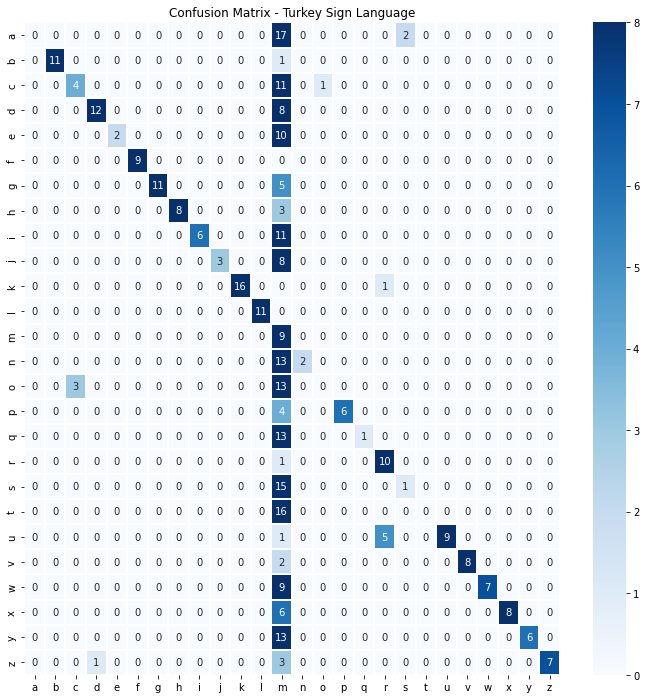

In [9]:
labels = sorted(list(set(df['Output'])))
labels = [x for x in labels]

fig, ax = plt.subplots(figsize=(12, 12))

ax.set_title("Confusion Matrix - Turkey Sign Language")

maping = sns.heatmap(cf_matrix, 
                     annot=True,
                     cmap = plt.cm.Blues, 
                     linewidths=.2,
                     xticklabels=labels,
                     yticklabels=labels, vmax=8,
                     fmt='g',
                     ax=ax
                    )
maping

In [10]:
import pickle

# save model
with open('model.pkl','wb') as f:
    pickle.dump(svm,f)